# 19.0简介

1. 聚类是无监督学习的核心任务，在没有目标向量（标签）的情况下，根据观察值之间的相似性，将其划分为潜在的分组（cluster）。
2. 目标：发现数据中隐藏的结构，例如将百货商店的购物者自动分为会员与非会员。
3. 本章重点：使用 scikit-learn 实现 5 种主流聚类算法，并应用于实际场景。

# 19.1使用K-Means聚类

In [2]:
# 加载库
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from notebooks.Chapter16_Logistic_Regression.ch16_Logistic_regression import new_observation

# 加载数据
iris = datasets.load_iris()
features = iris.data

# 标准化特征
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

# 创建K-Means对象
cluster = KMeans(n_clusters=3,random_state=0)

# 训练模型
model = cluster.fit(features_std)

C:\Users\24677\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


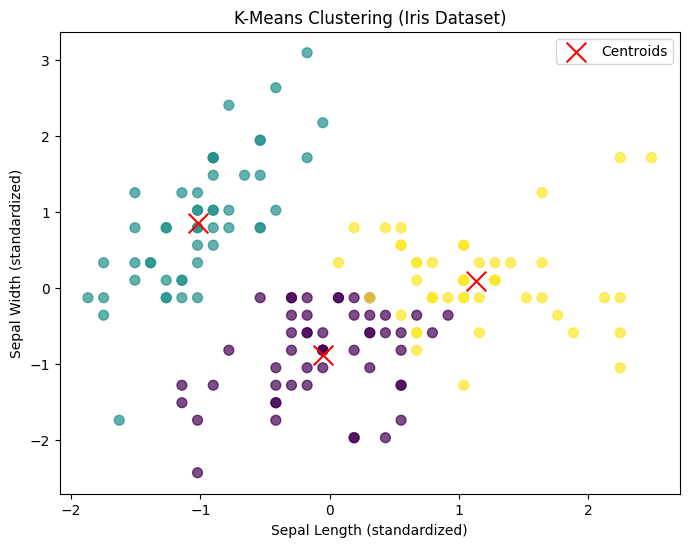

In [9]:
import matplotlib.pyplot as plt

# 1. 获取聚类结果
labels = model.labels_  # 每个样本所属的簇
centers = model.cluster_centers_  # 3个簇的中心点

# 2. 绘图
plt.figure(figsize=(8, 6))

# 画出所有样本点，颜色根据标签区分
plt.scatter(features_std[:, 0], features_std[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)

# 画出聚类中心（用红色的 X 表示）
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Centroids')

plt.title('K-Means Clustering (Iris Dataset)')
plt.xlabel('Sepal Length (standardized)')
plt.ylabel('Sepal Width (standardized)')
plt.legend()
plt.show()

In [4]:
# 查看预测分类
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [5]:
# 查看真实分类
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
# 创建新的观察值
new_observation = [[0.8,0.8,0.8,0.8]]

In [7]:
# 预测观察值的分类
model.predict(new_observation)

array([2])

In [8]:
#查看分类的中心点
model.cluster_centers_

array([[-0.05021989, -0.88337647,  0.34773781,  0.2815273 ],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [ 1.13597027,  0.08842168,  0.99615451,  1.01752612]])

## 核心知识点：K-Means 聚类算法

### 1. 算法步骤
1. **初始化**：随机创建 $k$ 个聚类的“中心”点（Centroids）。
2. **分配**：将每个观察值分配到离它最近的中心点所在的组。
3. **更新**：将中心点移动到其所在组内所有点的平均值位置。
4. **迭代**：重复步骤 2 和 3，直到没有观察值需要改变分组，算法收敛。


---

### 2. 关键假设
* **几何形状**：所有聚类都是凸形的（如圆形或球形）。
* **特征量纲**：所有特征在同一量纲（需进行**标准化**处理）。
* **规模均衡**：各组大小大致均衡。

---

### 3. 核心参数 (Scikit-learn)
| 参数 | 说明 |
| :--- | :--- |
| `n_clusters` | 聚类数量 $k$，是最重要的超参数。 |
| `n_jobs` | 设置为 `-1` 可使用所有 CPU 核心加速计算。 |

---

### 4. 评估指标
**轮廓系数 (Silhouette Coefficient)**：衡量同类相似度与不同类相似度的比值。
* 取值范围为 $[-1, 1]$。
* 越接近 1 代表聚类效果越好，越接近 -1 代表分类错误。

# 19.2 加速K-Means聚类

问题描述：
K-Means 算法在大数据集上运行太慢，需要加速。

In [10]:
# 加载库
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans

# 加载数据
iris = datasets.load_iris()
features = iris.data

# 标准化特征
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

# 创建K_Means对象
cluster = MiniBatchKMeans(n_clusters=3,random_state=0,batch_size=100)

# 训练模型
model = cluster.fit(features_std)

C:\Users\24677\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1972: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


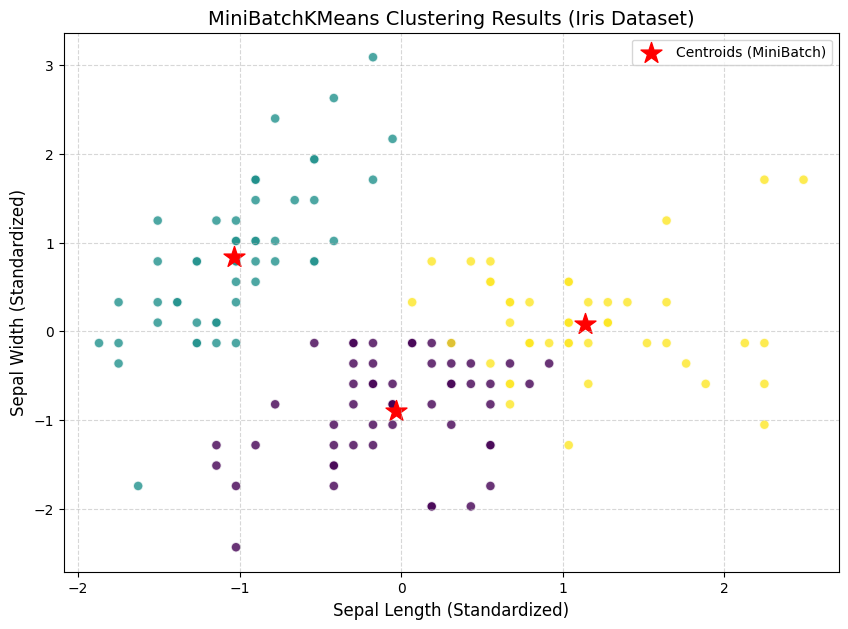

In [11]:
import matplotlib.pyplot as plt

# 1. 获取聚类结果
# labels 存储每个样本被分配的簇编号 (0, 1, 2)
labels = model.labels_
# centers 存储 3 个簇的中心点坐标
centers = model.cluster_centers_

# 2. 开始绘图
plt.figure(figsize=(10, 7))

# 绘制数据点：选取前两个特征（花萼长度和宽度）进行二维展示
# c=labels 让不同簇显示不同颜色，cmap='viridis' 是一个漂亮的色卡
scatter = plt.scatter(features_std[:, 0], features_std[:, 1],
                      c=labels, cmap='viridis', s=50, alpha=0.8, edgecolors='white')

# 绘制聚类中心：用红色的星号（*）标注
plt.scatter(centers[:, 0], centers[:, 1],
            c='red', marker='*', s=250, label='Centroids (MiniBatch)')

# 3. 装饰图表
plt.title('MiniBatchKMeans Clustering Results (Iris Dataset)', fontsize=14)
plt.xlabel('Sepal Length (Standardized)', fontsize=12)
plt.ylabel('Sepal Width (Standardized)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

## 核心知识点：Mini-Batch K-Means

* **定义**：**Mini-Batch K-Means** 是 K-Means 的优化版。它将计算量最大的步骤（分配观察值）只在随机抽取的小批量样本上执行，而非全量数据。

* **优势**：
    * 在仅损失少量聚类质量的前提下，显著缩短收敛时间。
    * 适合超大数据集。


* **关键参数**：
    * `batch_size`：控制每个批次中随机选择的观察值数量。
    * 批次越大，算力消耗越大。

* **用法**：与标准 K-Means 几乎完全一致。

# 19.3 使用Meanshift聚类算法

问题描述：
在不对聚类的数量k和形状做任何预设的情况下，对观察值进行聚类。

In [19]:
# 加载库
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MeanShift
import numpy as np
# 加载数据
iris = datasets.load_iris()
features = iris.data

# 标准化特征
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

# 创建MeanShift对象
cluster = MeanShift(n_jobs=-1)

# 训练模型
model = cluster.fit(features_std)

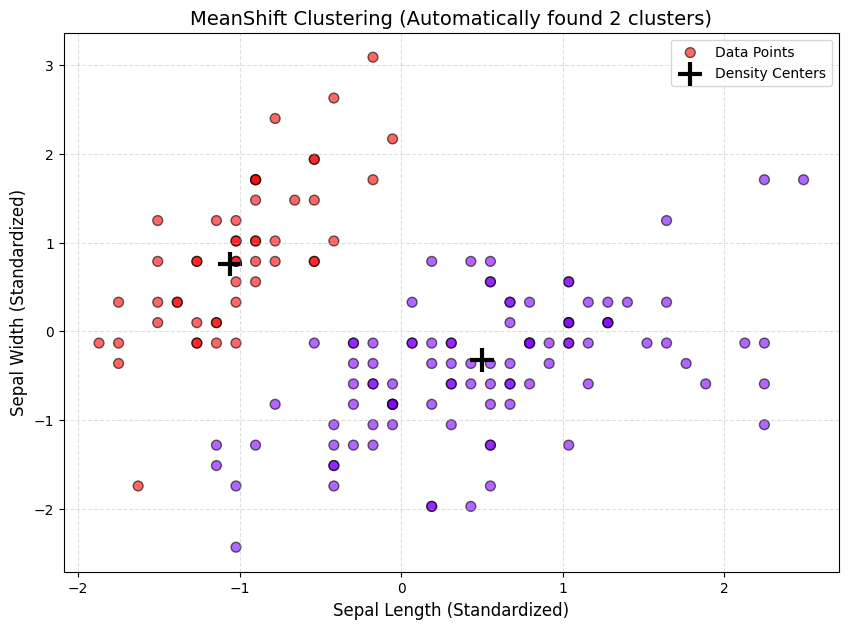

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# 1. 获取聚类结果
labels = model.labels_  # 自动生成的类别标签
cluster_centers = model.cluster_centers_  # 算法发现的密度中心（峰值）
n_clusters_ = len(np.unique(labels))  # 统计总共分成了几类

# 2. 绘图
plt.figure(figsize=(10, 7))

# 画出样本点：颜色由 labels 决定，cmap 使用色彩鲜艳的 'rainbow'
plt.scatter(features_std[:, 0], features_std[:, 1], c=labels,
            cmap='rainbow', s=50, alpha=0.6, edgecolors='k', label='Data Points')

# 画出聚类中心：用巨大的黑色 '+' 号表示
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='+',
            s=300, linewidths=3, color='black', label='Density Centers')

# 3. 图表修饰
plt.title(f'MeanShift Clustering (Automatically found {n_clusters_} clusters)', fontsize=14)
plt.xlabel('Sepal Length (Standardized)', fontsize=12)
plt.ylabel('Sepal Width (Standardized)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)

plt.show()

In [15]:
# 看看 MeanShift 自动识别出了几个类别
unique_labels = np.unique(model.labels_)
print(f"MeanShift 自动发现了 {len(unique_labels)} 个簇")

MeanShift 自动发现了 2 个簇


## 核心知识点：Meanshift聚类算法
###  Mean Shift (均值漂移)
* **核心思想**：类比“雾天足球场”，每个观察值（人）会向周围密度最高的区域（人多的地方）移动，最终自然形成聚类。
* **优势**：
    * **无需预设**聚类数量 $k$。
    * 能自动发现数据中聚类的数量和**任意形状**。
* **关键参数**：
    * `bandwidth`：定义了观察值用于决定移动方向的“核”（区域）半径。默认会自动估计一个合理值，但会增加计算开销。
    * `cluster_all`：设置为 `False` 时，会将孤立的“孤值”（核中无其他点）标记为 `-1`，而非强制分配到最近的聚类。

# 19.4 使用DBSCAN聚类算法

In [22]:
# 加载库
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# 加载数据
iris = datasets.load_iris()
features = iris.data

# 标准化特征
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

# 创建DBSCAN对象
cluster = DBSCAN(n_jobs=-1)

# 训练模型
model = cluster.fit(features_std)

In [23]:
# 显示聚类的情况
model.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1],
      dtype=int64)

In [24]:
import numpy as np

# 查看聚类结果
labels = model.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f"DBSCAN 发现了 {n_clusters_} 个簇")
print(f"发现了 {n_noise_} 个噪声点")

DBSCAN 发现了 2 个簇
发现了 34 个噪声点


C:\Users\24677\AppData\Local\Temp\ipykernel_16008\2193599584.py:31: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(features_std[class_member_mask, 0],


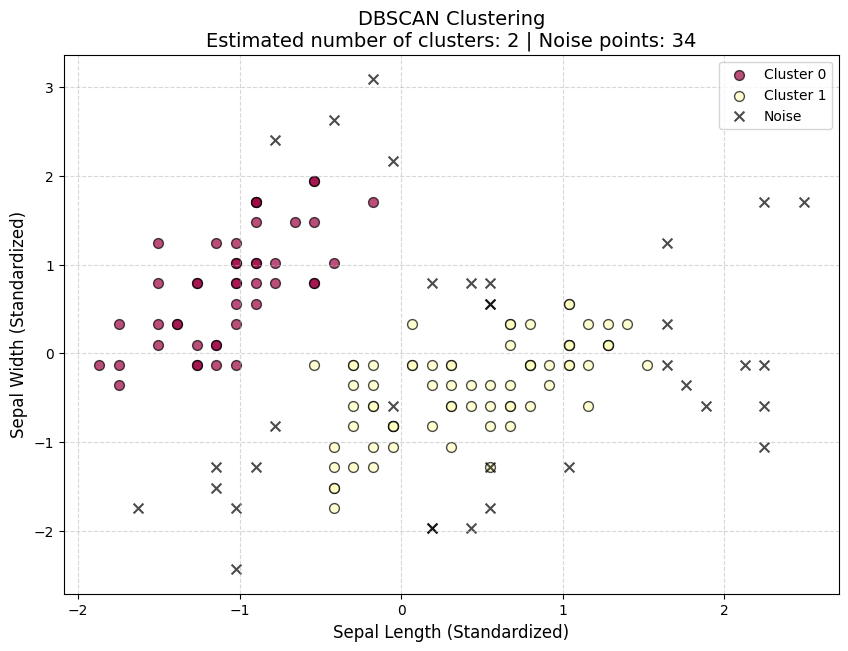

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# 1. 提取聚类信息
labels = model.labels_
# 计算簇的数量（排除噪声点 -1）
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# 计算噪声点的数量
n_noise_ = list(labels).count(-1)

# 2. 绘图设置
plt.figure(figsize=(10, 7))

# 定义颜色映射：为噪声点分配专门的颜色（例如黑色）
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # 噪声点用黑色绘制，并使用较小的尺寸
        col = [0, 0, 0, 1]
        marker = 'x'
        label = 'Noise'
    else:
        marker = 'o'
        label = f'Cluster {k}'

    class_member_mask = (labels == k)

    # 画出属于该类别的点
    plt.scatter(features_std[class_member_mask, 0],
                features_std[class_member_mask, 1],
                c=[col], marker=marker, s=50,
                edgecolors='k', alpha=0.7, label=label)

# 3. 装饰图表
plt.title(f'DBSCAN Clustering\nEstimated number of clusters: {n_clusters_} | Noise points: {n_noise_}', fontsize=14)
plt.xlabel('Sepal Length (Standardized)', fontsize=12)
plt.ylabel('Sepal Width (Standardized)', fontsize=12)
plt.legend(loc='best')
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

## DBSCAN聚类算法
###  DBSCAN (基于密度的空间聚类)
* **核心思想**：基于密度，寻找数据中紧密相连的高密度区域，将其作为聚类，低密度区域的点则被视为噪声。
* **算法步骤**：
    1. 随机选择一个观察值。
    2. 如果其邻居数达到最小限度，则将其标记为“核心点”，并归入一个聚类。
    3. 对核心点的所有邻居递归执行步骤 2，扩展聚类。
    4. 选择新的随机点，重复上述过程。
* **关键参数**：
    * `eps`：定义“邻居”的最大距离阈值，超过此距离则不再视为邻居。
    * `min_samples`：一个点要成为“核心点”，其 `eps` 邻域内所需的最少邻居数量。
    * `metric`：距离度量方式，如欧氏距离 (`euclidean`)。
* **输出**：模型标签中，`-1` 代表噪声点，其他整数代表不同的聚类。

# 19.5 使用层次合并聚类算法

问题描述：
利用聚类的层次结构，对观察值进行分组。

In [26]:
# 加载库
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

#加载数据
iris = datasets.load_iris()
features = iris.data

# 标准化特征
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

#创建一个Agglomerative聚类对象
cluster = AgglomerativeClustering(n_clusters=3)

# 训练模型
model = cluster.fit(features_std)

In [28]:
# 显示聚类的情况
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

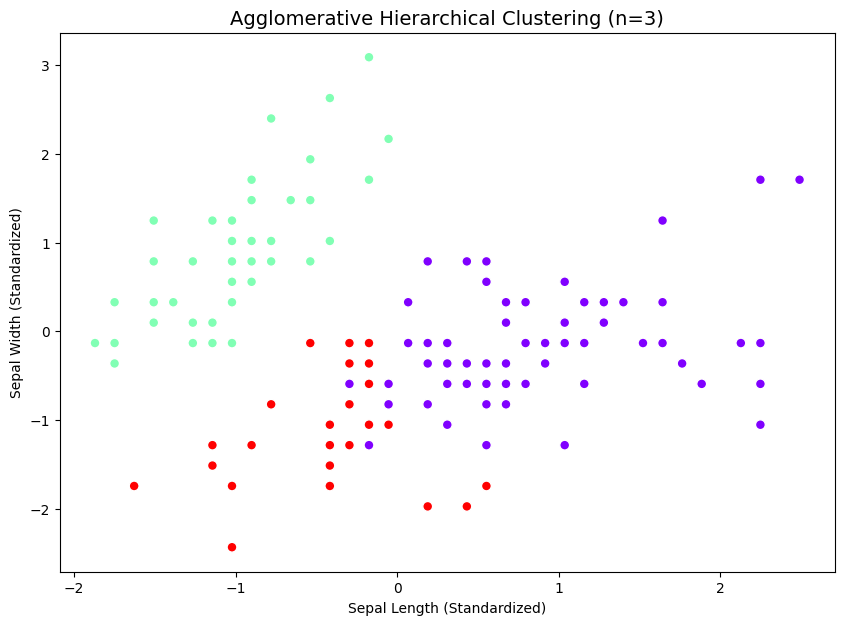

In [29]:
import matplotlib.pyplot as plt

# 获取标签
labels = model.labels_

plt.figure(figsize=(10, 7))
# 绘制散点图
plt.scatter(features_std[:, 0], features_std[:, 1], c=labels, cmap='rainbow', s=50, edgecolors='white')

plt.title('Agglomerative Hierarchical Clustering (n=3)', fontsize=14)
plt.xlabel('Sepal Length (Standardized)')
plt.ylabel('Sepal Width (Standardized)')
plt.show()

##  层次聚类 (Agglomerative Clustering)
* **核心思想**：自底向上的层次聚类。初始时，每个观察值都是一个独立的聚类。然后，不断合并满足条件的两个聚类，直到达到预设的聚类数量。
* **合并策略 (linkage)**：
    * `ward` (默认)：最小化合并后新聚类的方差，最常用。
    * `average`：最小化两个聚类之间所有点的平均距离。
    * `complete`：最小化两个聚类之间所有点的最大距离。
* **关键参数**：
    * `affinity`：用于计算距离的度量方式（如 `euclidean`、`minkowski`）。
    * `n_clusters`：目标聚类数量，合并过程将持续直到达到该数量。

# 第19章 聚类精简总结
## 一、章节核心内容
本章讲**无监督聚类**：在**没有标签（y值）**的前提下，按样本间相似度把数据自动分成若干组（簇），发现数据隐藏结构。
所有聚类算法**都对特征尺度敏感**，使用前**必须做标准化**。

共 5 种聚类方法，覆盖从「指定簇数」到「自动找簇」、从「球形簇」到「任意形状簇」的全场景。

---

## 二、5 种聚类算法核心对比表
| 算法 | 是否要指定k | 核心思路 | 优点 | 适用场景 | 缺点 |
|------|-------------|----------|------|----------|------|
| **K-Means** | 是 | 找k个中心点，迭代归并+更新均值 | 简单、快、效果稳 | 连续特征、簇近似**球形/凸形**、数据量中等 | 对异常值敏感、必须设k、不适合非凸簇 |
| **MiniBatch K-Means** | 是 | K-Means加速版，用小批量样本训练 | 极快、适合大数据 | 超大数据集、追求速度 | 精度略低于标准K-Means |
| **MeanShift** | 否 | 向密度最高区域靠拢，自动定簇数 | 不用设k、支持任意形状簇 | 不知道簇数、数据密度不均 | 高维数据慢、带宽难调 |
| **DBSCAN** | 否 | 按**密度**聚簇，标记噪声点 | 不用设k、识别异常值、非凸簇友好 | 带噪声、不规则簇、需要剔除离群点 | 高维难调参、密度差异大时效果差 |
| **层次聚类(Agglomerative)** | 是 | 自底向上，不断合并最近簇 | 可看层次结构、簇边界清晰 | 小数据、需要树形聚类结构 | 大数据很慢、必须设k |

---

## 三、一句话记住本章
- 知道分几类、数据规整 → **K-Means**
- 数据超大要提速 → **MiniBatch K-Means**
- 不知道分几类、要任意形状 → **MeanShift / DBSCAN**
- 小数据、要层次结构 → **层次聚类**